In [3]:
from __future__ import division, print_function
import os, glob, matplotlib.pyplot as plt, numpy as np, pandas as pd, math
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline


In [4]:
%pwd

'C:\\Users\\Syht\\Documents\\Stage_LNC\\Python\\StochPong\\dev'

In [5]:
fname_list = glob.glob(os.path.join('..', 'datadir', 'pilot', '*lvl4*csv'))

In [6]:
_, fname = os.path.split(fname_list[0])
fname, ext = fname.split('.')
print(fname)
date, time, _, level, name = fname.split('_')
print(date, time, _, level, name)

2017-06-28_135706_dataframe_lvl4_juliette
2017-06-28 135706 dataframe lvl4 juliette


Duration per level (in seconds) = [210.93]
Total duration = 3.52 min


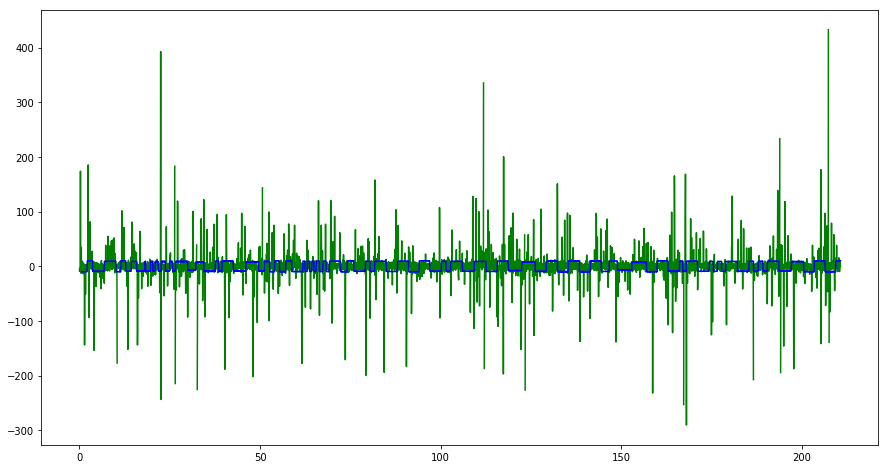

In [7]:
#subjects = ['remi', 'valerie', 'jade', 'juliette', 'elisa', 'maxime']
subjects = ['remi']
t, x, y, duration, fig, grad = {}, {}, {}, [], [], []
dfs = {}

for subj in subjects:
    i = 1
    for file in glob.glob(os.path.join('..', 'datadir', 'pilot', '*lvl1*csv')):
        if subj in file:
            dfs['df%s%s' %(subj, i)] = pd.read_csv(os.path.join(file), '\t')
            i += 1

# The dataframes are in the variables named : key = df<subject_name><level_number> and stored in a dict
j = 0
for key, df in dfs.items():
    fig.append(fig)
    fig[j], ax = plt.subplots(figsize=(15,8))
    for obj, color in zip(['gaze', 'ball', 'paddle'], ['g', 'b', 'r']):
        if obj == 'gaze':
            t[obj], x[obj], y[obj] = df.loc[:,'Tgaze'], df.loc[:,'Xgaze'], df.loc[:,'Ygaze']
        if obj == 'ball':
            t[obj], x[obj], y[obj] = df.loc[:,'Tball'], df.loc[:,'Xball'], df.loc[:,'Yball']
        if obj == 'paddle':
            t[obj], x[obj], y[obj] = df.loc[:,'Tpaddle'], df.loc[:,'Xpaddle'], df.loc[:,'Ypaddle']
    j += 1

    duration.append(float(str(round(t['gaze'][len(t['gaze'])-1] - t['gaze'][0],3)))) # retrieve the lengths of the levels

    """ Gradients """
    N_start, N_stop = 0, int((t['gaze'][len(t['gaze'])-1] - t['gaze'][0])*30)
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['gaze'])[N_start:N_stop], 'g')
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['ball'])[N_start:N_stop], 'b')

    # find the moment when the ball collide with an element from below
    k = 0
    for w in np.gradient(y['ball'])[N_start:N_stop]:
        k += 1
        if w == 0:
            if np.gradient(y['ball'])[k-2] < 0:
                grad.append(k)

print("Duration per level (in seconds) = " + str(duration))
print("Total duration = " + str(round(sum(duration)/60, 2)) + " min")

In [8]:
df = {}

for file in glob.glob(os.path.join('..', 'datadir', 'pilot', '*csv')):
    df_ = pd.read_csv(file, '\t')

    _, fname = os.path.split(file)
    fname, ext = fname.split('.')
    date, time, _, level, subj = fname.split('_')
    print('Gathering data for', subj, 'at level ', level)
    try:
        df[subj][level] = {}
    except:
        df[subj] = {}
        df[subj][level] = {}

    for axis in ['T', 'X', 'Y']:
        for obj in ['gaze', 'ball', 'paddle']:
            df[subj][level][axis+obj] = df_[axis+obj]

Gathering data for juliette at level  lvl1
Gathering data for juliette at level  lvl2
Gathering data for juliette at level  lvl3
Gathering data for juliette at level  lvl4
Gathering data for juliette at level  lvl5
Gathering data for juliette at level  lvl6
Gathering data for remi at level  lvl1
Gathering data for remi at level  lvl2
Gathering data for remi at level  lvl3
Gathering data for remi at level  lvl4
Gathering data for remi at level  lvl5
Gathering data for remi at level  lvl6
Gathering data for valerie at level  lvl1
Gathering data for valerie at level  lvl2
Gathering data for valerie at level  lvl3
Gathering data for valerie at level  lvl4
Gathering data for valerie at level  lvl5
Gathering data for valerie at level  lvl6
Gathering data for elisa at level  lvl1
Gathering data for elisa at level  lvl2
Gathering data for elisa at level  lvl3
Gathering data for elisa at level  lvl4
Gathering data for elisa at level  lvl5
Gathering data for elisa at level  lvl6
Gathering data f

In [9]:
for subject in df.keys():
    for level in df[subject].keys():
        print('Gathered data for', subject, 'at level ', level)

Gathered data for juliette at level  lvl1
Gathered data for juliette at level  lvl2
Gathered data for juliette at level  lvl3
Gathered data for juliette at level  lvl4
Gathered data for juliette at level  lvl5
Gathered data for juliette at level  lvl6
Gathered data for remi at level  lvl1
Gathered data for remi at level  lvl2
Gathered data for remi at level  lvl3
Gathered data for remi at level  lvl4
Gathered data for remi at level  lvl5
Gathered data for remi at level  lvl6
Gathered data for valerie at level  lvl1
Gathered data for valerie at level  lvl2
Gathered data for valerie at level  lvl3
Gathered data for valerie at level  lvl4
Gathered data for valerie at level  lvl5
Gathered data for valerie at level  lvl6
Gathered data for elisa at level  lvl1
Gathered data for elisa at level  lvl2
Gathered data for elisa at level  lvl3
Gathered data for elisa at level  lvl4
Gathered data for elisa at level  lvl5
Gathered data for elisa at level  lvl6
Gathered data for maxime at level  lvl1


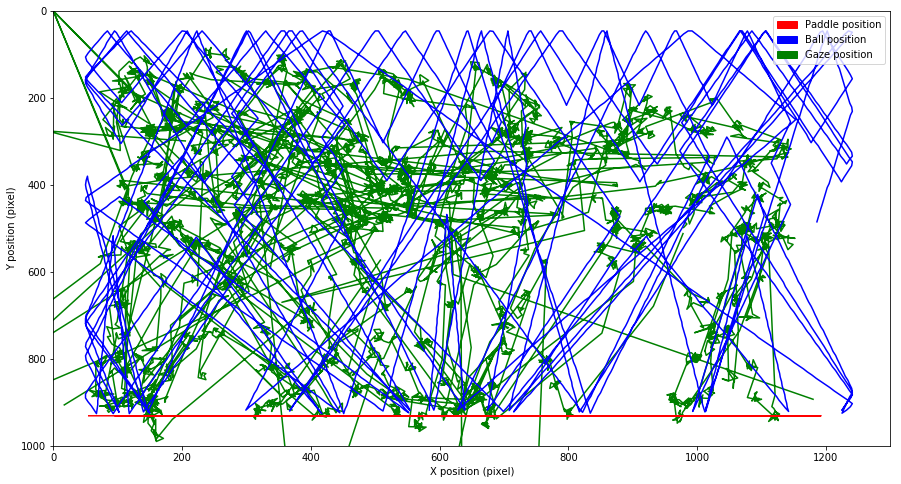

In [28]:
import matplotlib.patches as matpatch
plt.figure(figsize=(15,8))
plt.plot(x['gaze'], y['gaze'], 'g')
plt.plot(x['ball'], y['ball'], 'b')
plt.plot(x['paddle'], y['paddle'], 'r')
red_patch = matpatch.Patch(color='red', label='Paddle position')
blue_patch = matpatch.Patch(color='blue', label='Ball position')
green_patch = matpatch.Patch(color='green', label='Gaze position')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.xlabel('X position (pixel)')
plt.ylabel('Y position (pixel)')
plt.ylim([0, 1000])
plt.xlim([0, 1300])
plt.gca().invert_yaxis() # invert the y-axis
plt.show()

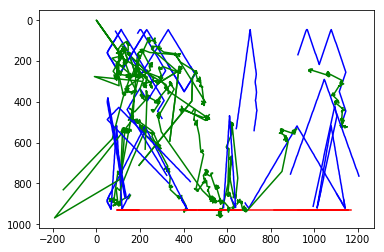

In [10]:
for v in grad:
    plt.plot(x['gaze'][v-50:v+50], y['gaze'][v-50:v+50], 'g')
    plt.plot(x['ball'][v-50:v+50], y['ball'][v-50:v+50], 'b')
    plt.plot(x['paddle'][v-50:v+50], y['paddle'][v-50:v+50], 'r')
    plt.gca().invert_yaxis() # invert the y-axis

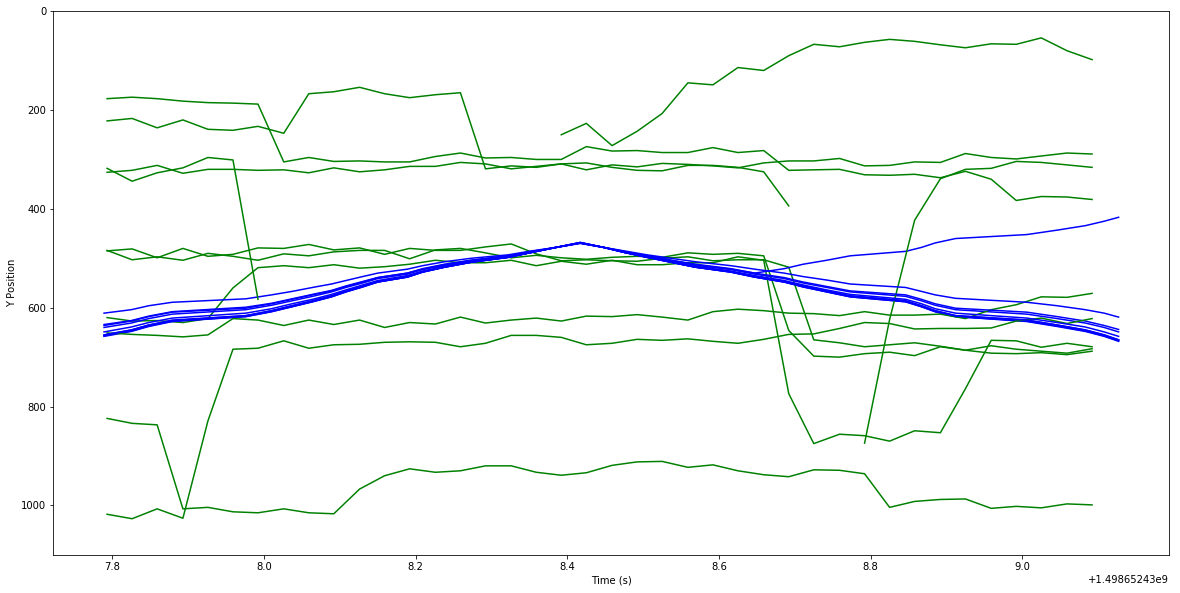

In [11]:
plt.figure(figsize=(20,10))
deltav = 20
for v in grad:
    if y['ball'][v] > 60:
        diff = y['ball'][grad[0]] - y['ball'][v]
        """print(diff)
        print(list(y['ball'][v-deltav:v+deltav]))
        print(list(y['ball'][v-deltav:v+deltav]) + diff)
        print('\n')"""
        plt.plot(t['gaze'][0:2*deltav], list(y['gaze'][v-deltav:v+deltav]) + diff, 'g')
        plt.plot(t['paddle'][0:2*deltav], list(y['ball'][v-deltav:v+deltav]) + diff, 'b')
        #plt.plot(t['paddle'][0:2*deltav], y['paddle'][v-deltav:v+deltav], 'r')
        plt.ylabel('Y Position')
        plt.xlabel('Time (s)')
        plt.ylim((0,1100))
        plt.gca().invert_yaxis()

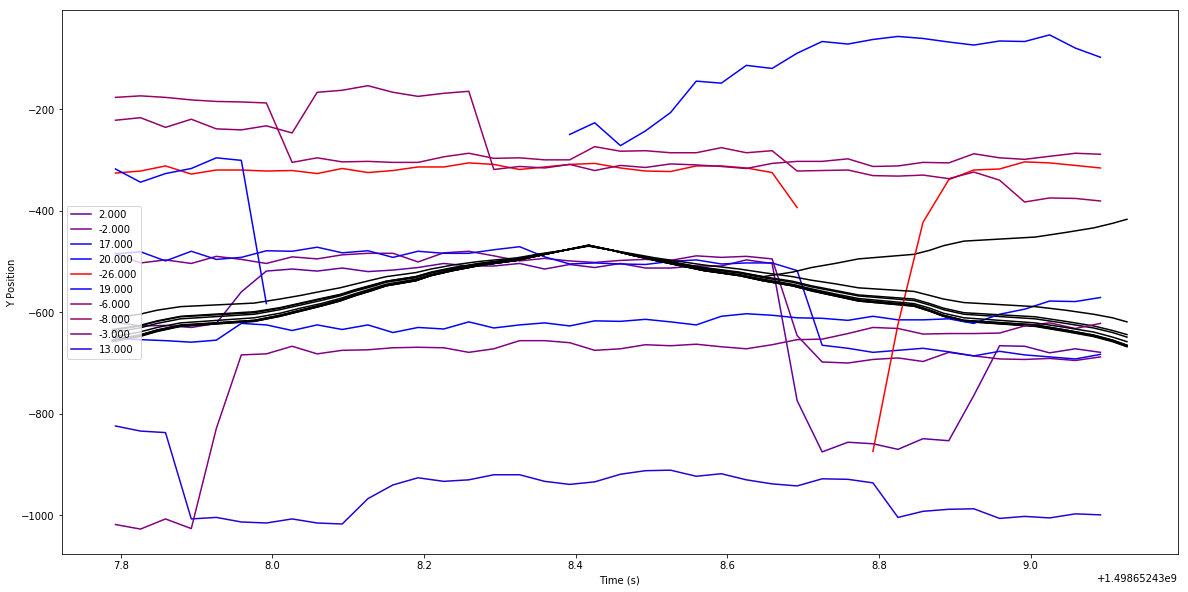

In [12]:
plt.figure(figsize=(20,10))
deltav = 20
grad_h_abs = []

for v in grad:
    grad_h_abs.append(x['ball'][v+2] - x['ball'][v-2])

grad_h = np.array(grad_h_abs)
grad_h -= grad_h.min()
grad_h /= grad_h.max() # normalisation entre 0 et 1

for v, g_h, g_h_abs in zip(grad, grad_h, grad_h_abs):
    if y['ball'][v] > 60:
        c = [1-g_h, 0, g_h]
        diff = y['ball'][grad[0]] - y['ball'][v]
        plt.plot(t['gaze'][0:2*deltav], -np.array(y['gaze'][v-deltav:v+deltav]) - diff, c=c, label='%0.3f' % g_h_abs)
        plt.plot(t['paddle'][0:2*deltav], -np.array(y['ball'][v-deltav:v+deltav]) - diff, 'k')
        #plt.plot(t['paddle'][0:2*deltav], y['paddle'][v-deltav:v+deltav], 'r')
        plt.ylabel('Y Position')
        plt.xlabel('Time (s)')
        #plt.ylim((300, 100))
        plt.gca().invert_yaxis()
        plt.legend(loc='center left')

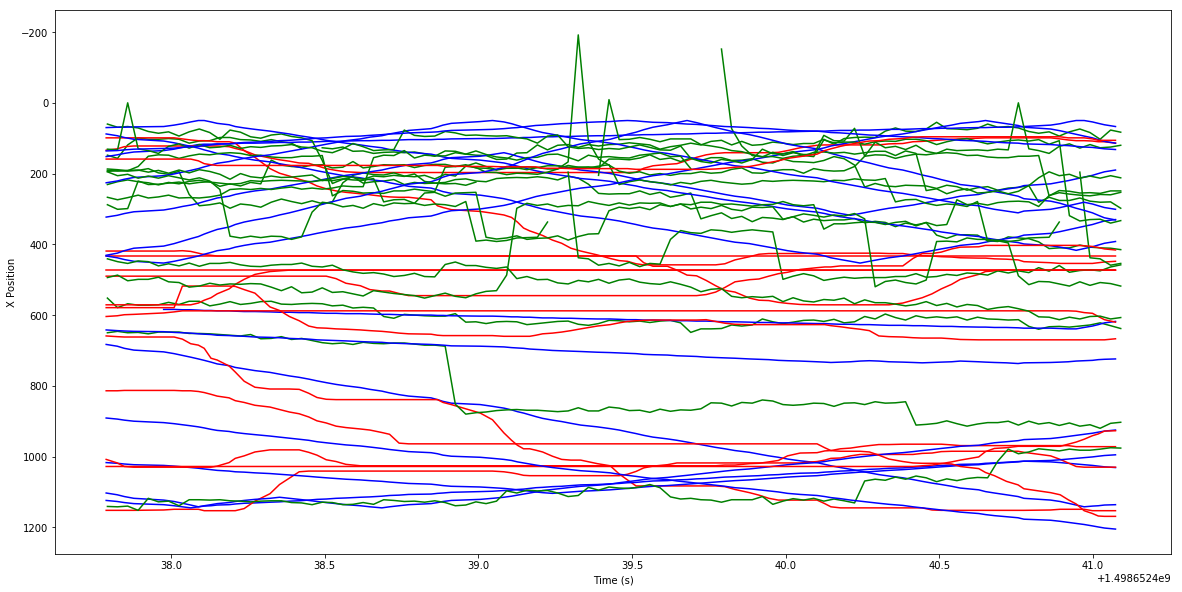

In [13]:
plt.figure(figsize=(20,10))
deltav = 50
for v in grad:
    plt.plot(t['gaze'][0:2*deltav], x['gaze'][v-deltav:v+deltav], 'g')
    plt.plot(t['paddle'][0:2*deltav], x['ball'][v-deltav:v+deltav], 'b')
    plt.plot(t['paddle'][0:2*deltav], x['paddle'][v-deltav:v+deltav], 'r')
    plt.ylabel('X Position')
    plt.xlabel('Time (s)')
    plt.gca().invert_yaxis()

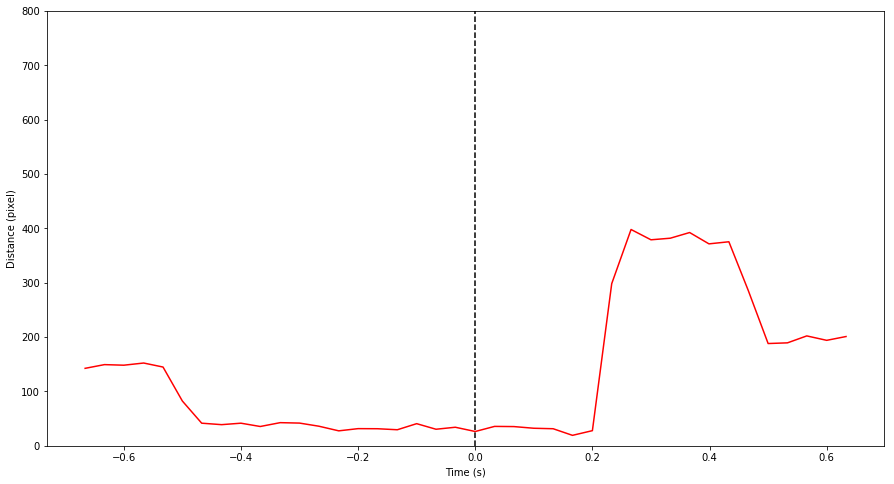

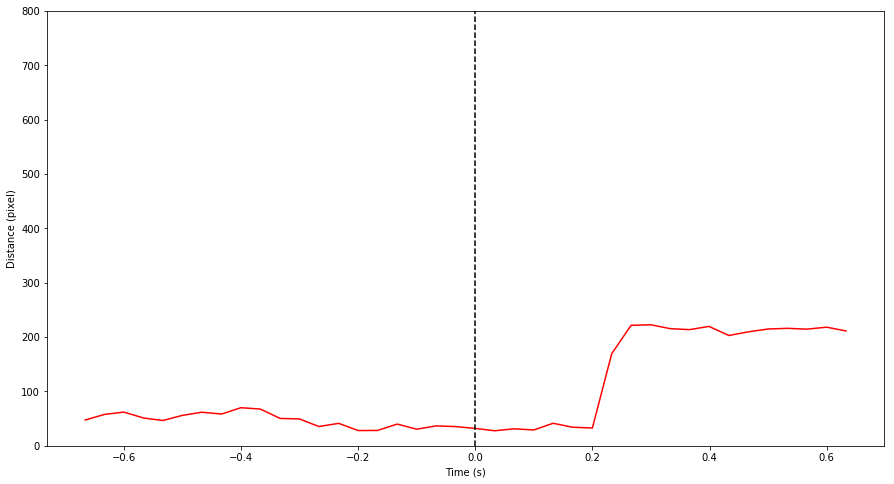

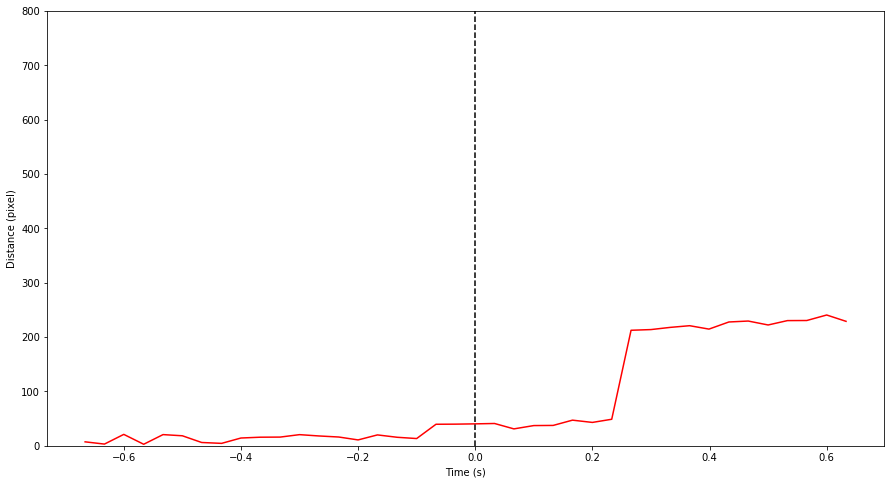

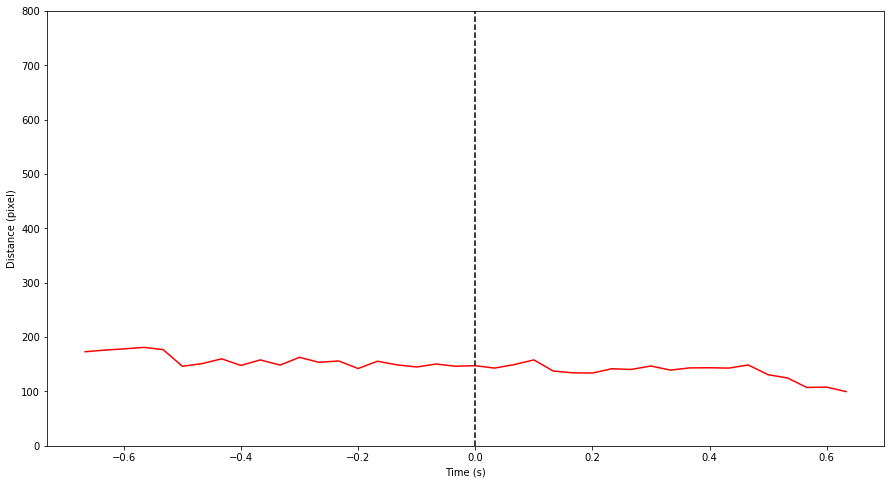

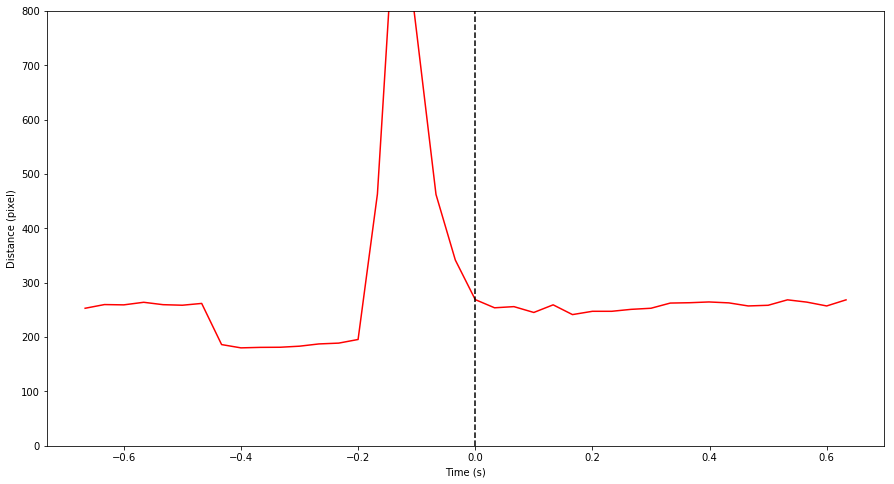

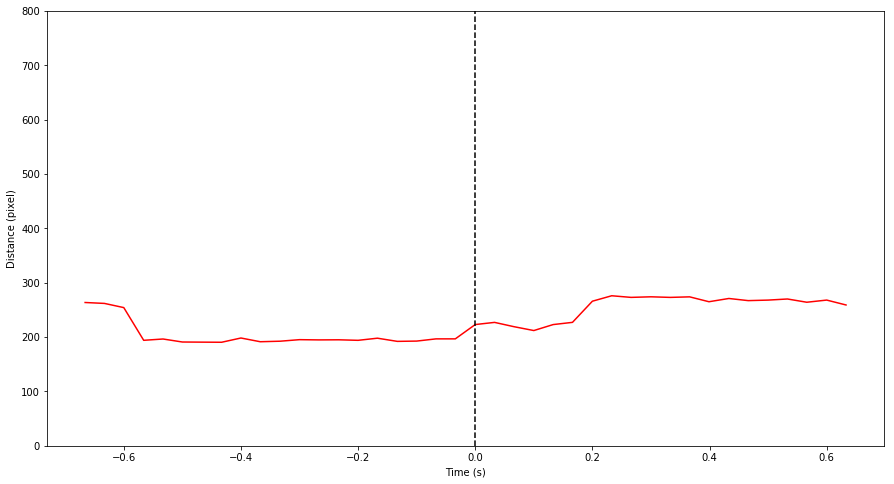

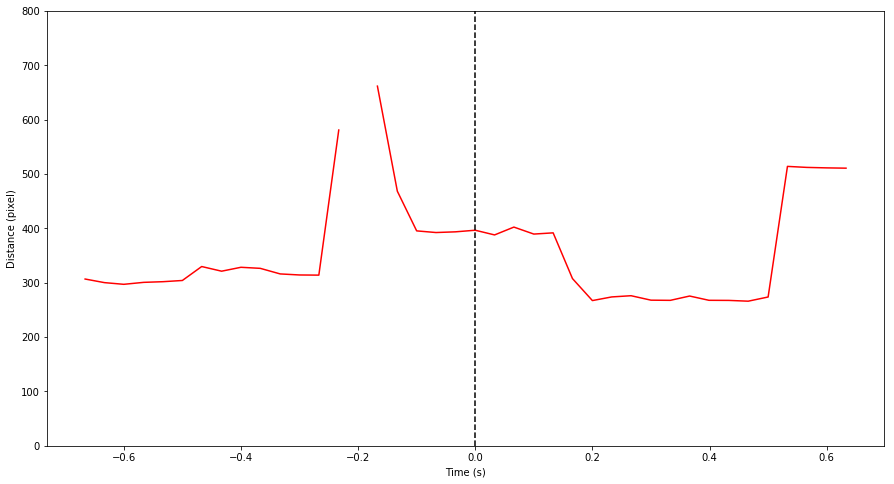

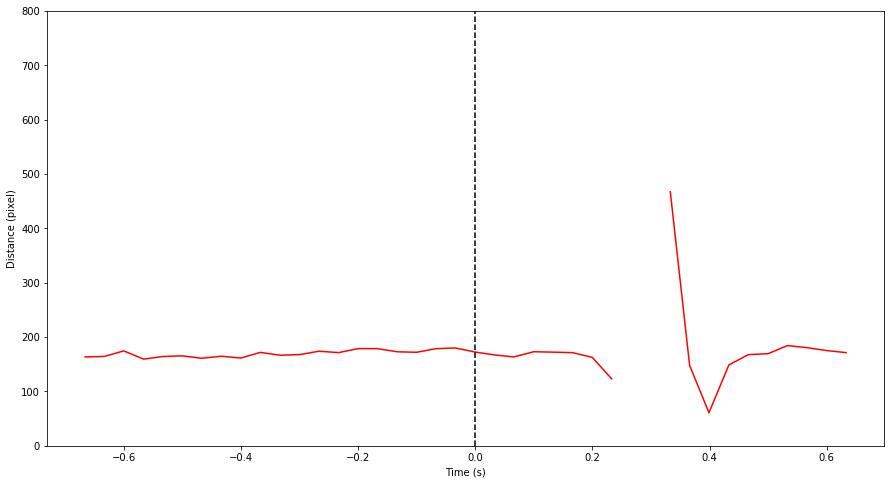

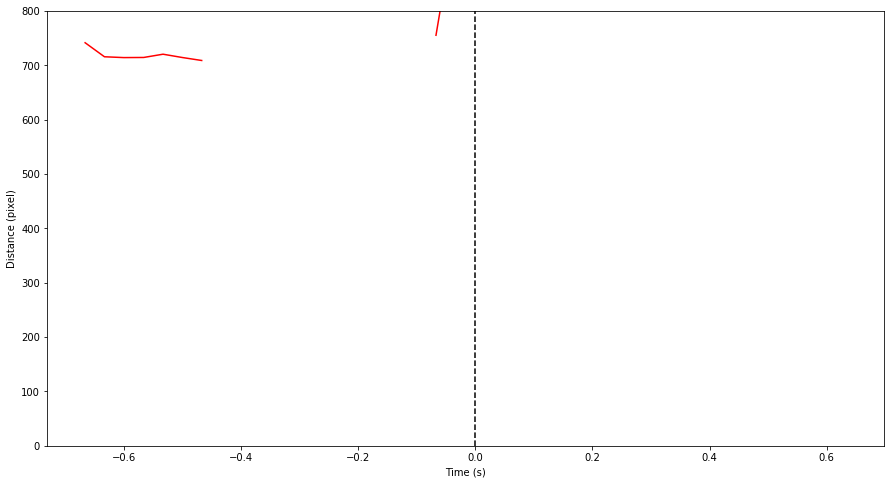

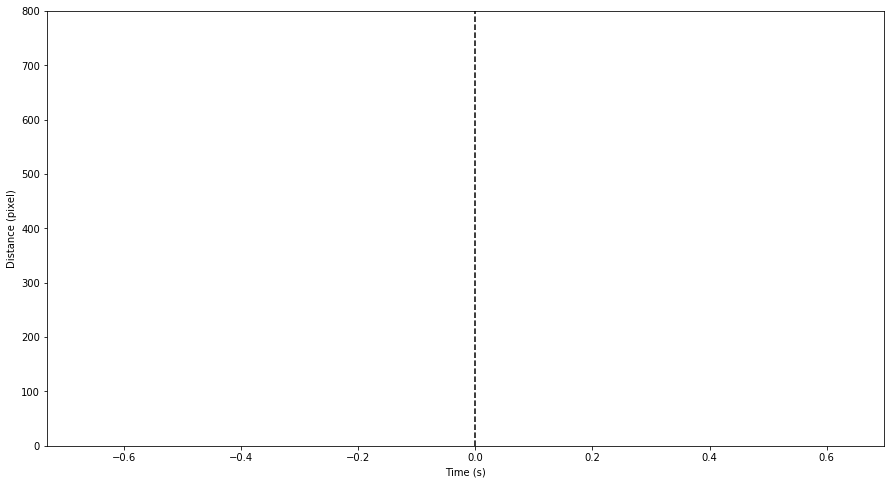

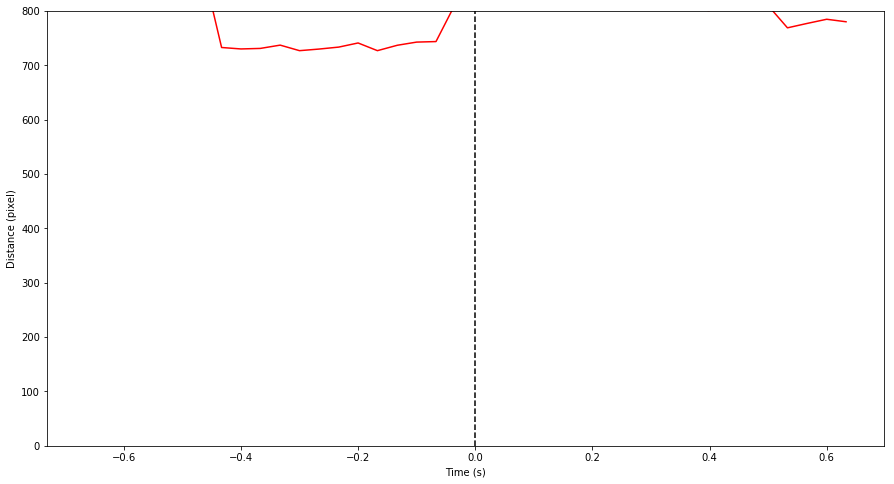

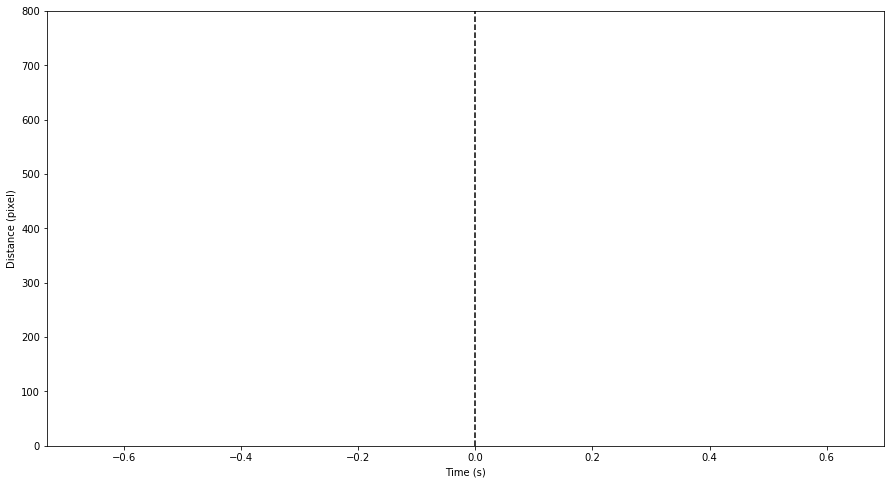

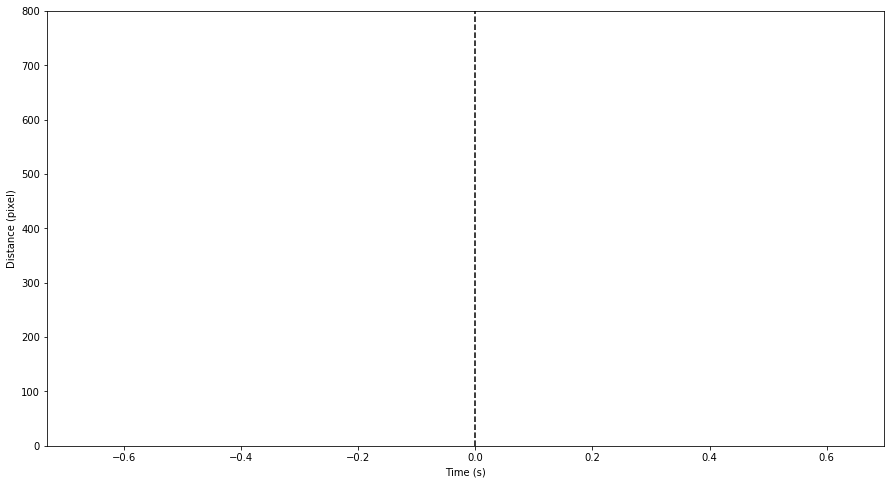

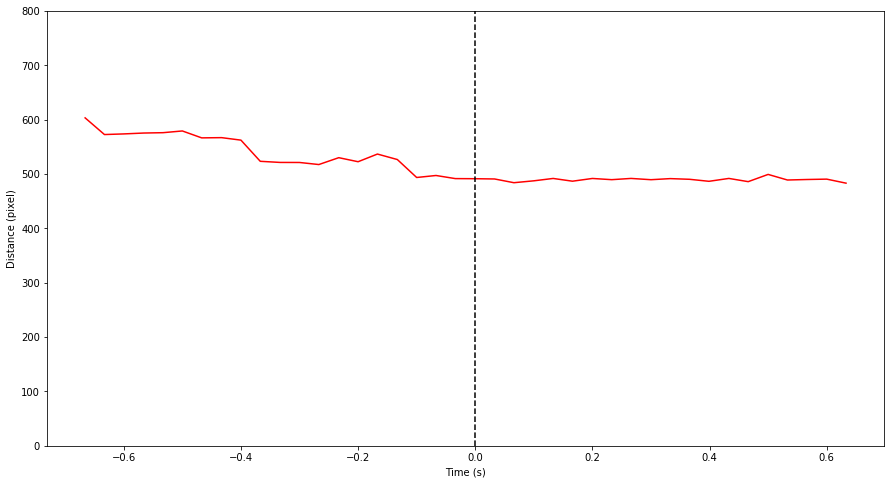

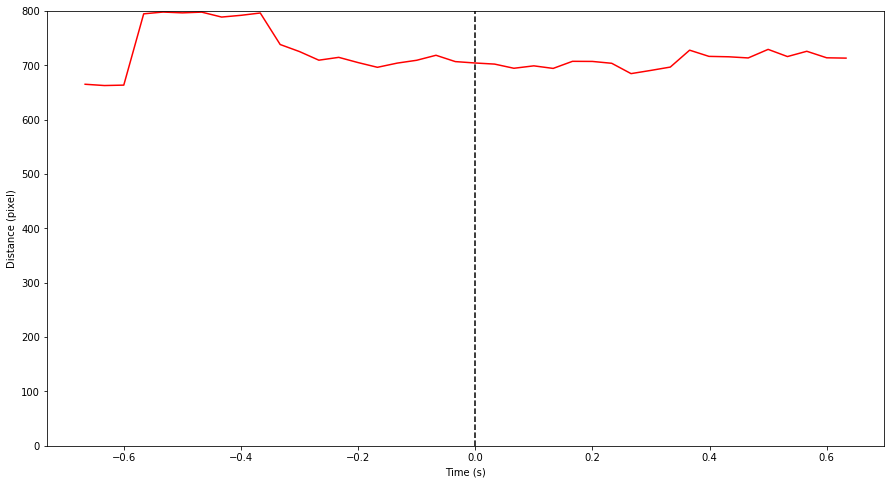

In [29]:
deltav = 20

for v in grad:

    fig, ax = plt.subplots(figsize=(15,8))
    #ax.plot(t['gaze'][0:2*deltav]-t['gaze'][deltav], np.sqrt((y['gaze'][v-deltav:v+deltav]- y['ball'][v-deltav:v+deltav])**2 + (x['gaze'][v-deltav:v+deltav]-x['ball'][v-deltav:v+deltav])**2), 'g')
    ax.plot(t['gaze'][0:2*deltav]-t['gaze'][deltav], np.sqrt((y['gaze'][v-deltav:v+deltav]- y['ball'][v])**2 + (x['gaze'][v-deltav:v+deltav]-x['ball'][v])**2), 'r')
    ax.plot([0, 0], [0, 800], 'k--')
    #ax.plot(t['paddle'][0:2*deltav], y['paddle'][v-deltav:v+deltav], 'r')
    ax.set_ylabel('Distance (pixel)')
    ax.set_xlabel('Time (s)')
    ax.set_ylim(0, 800)

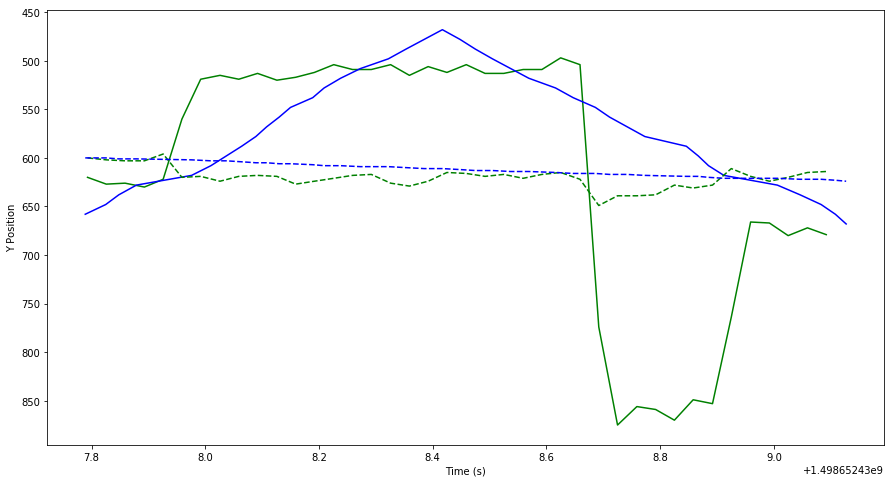

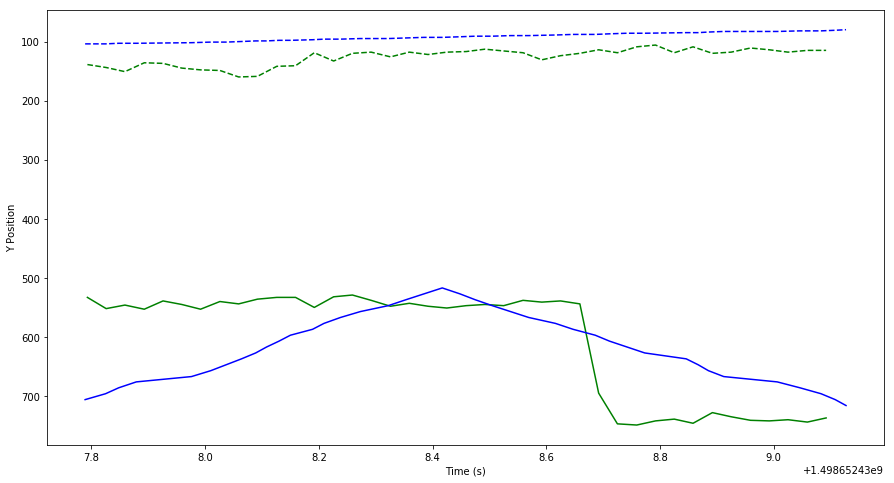

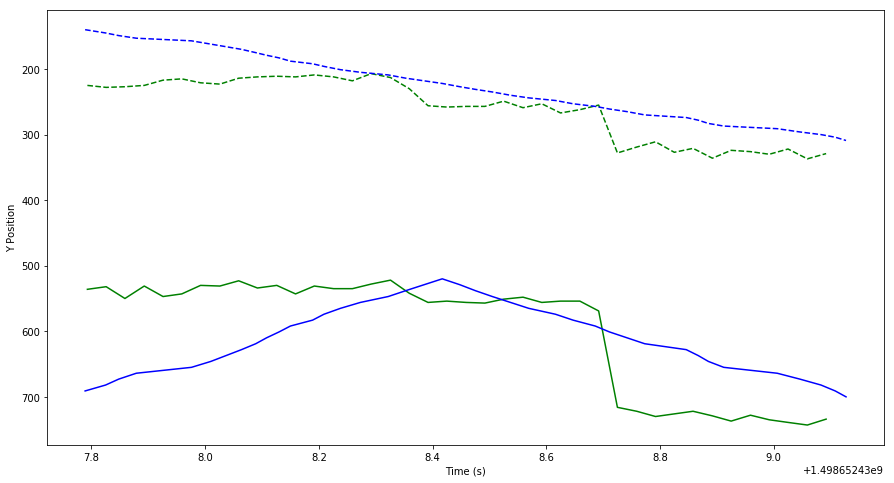

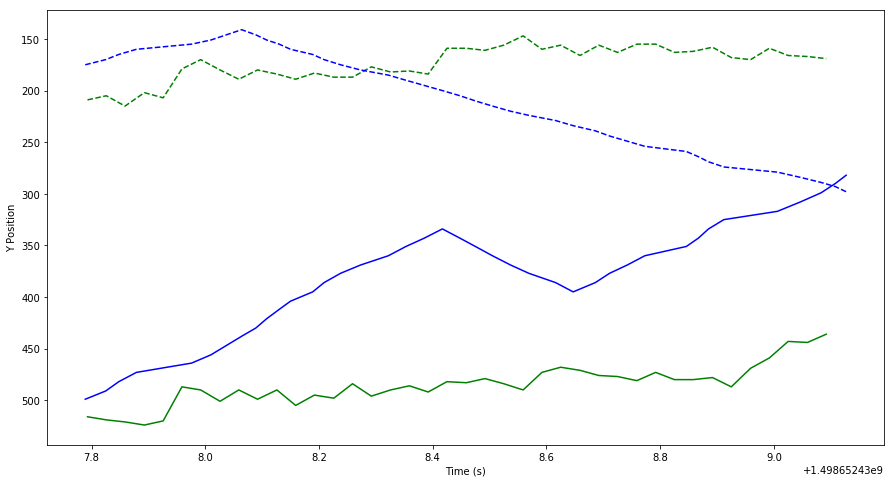

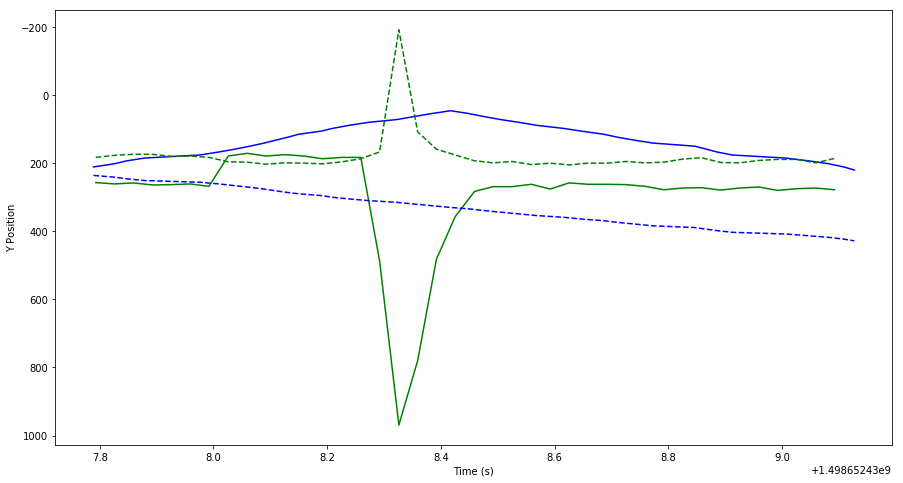

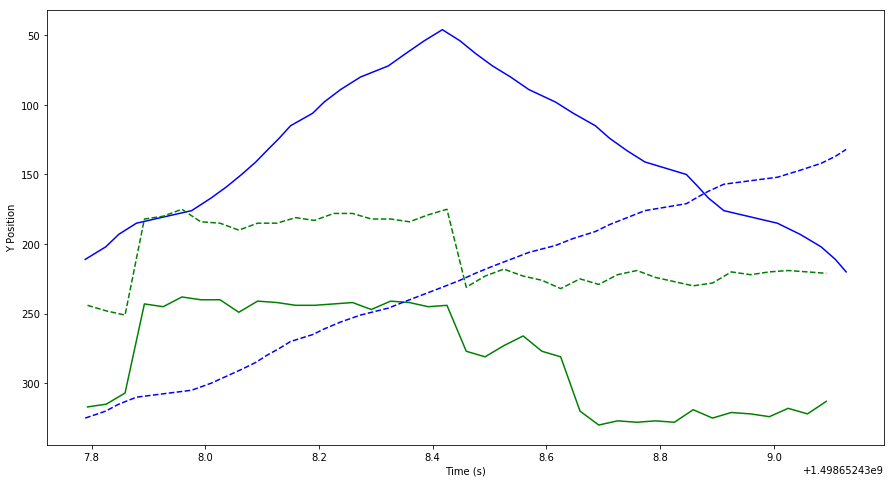

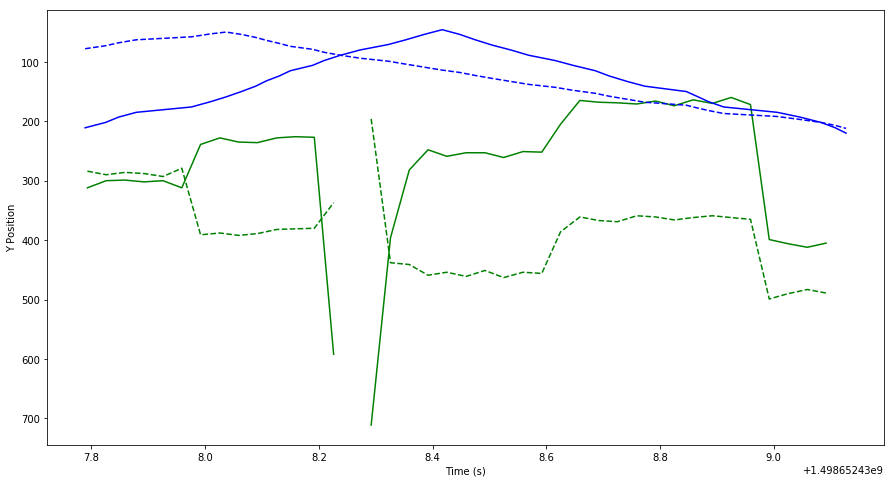

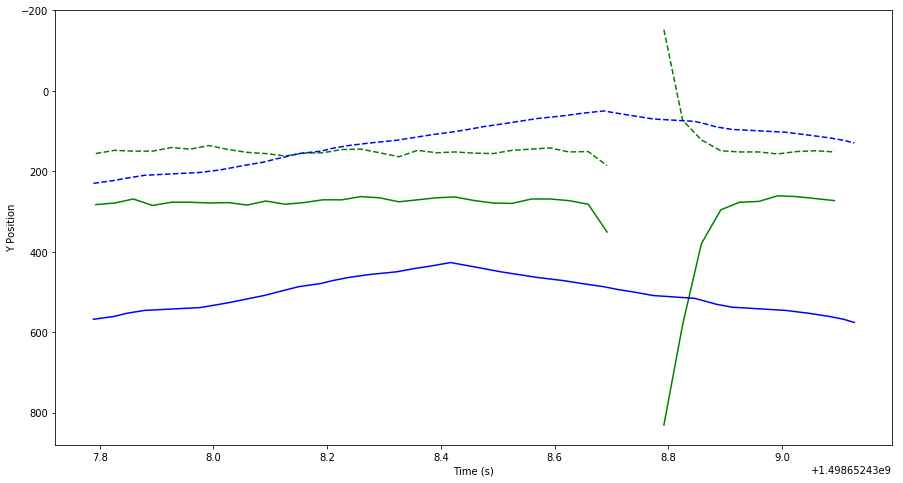

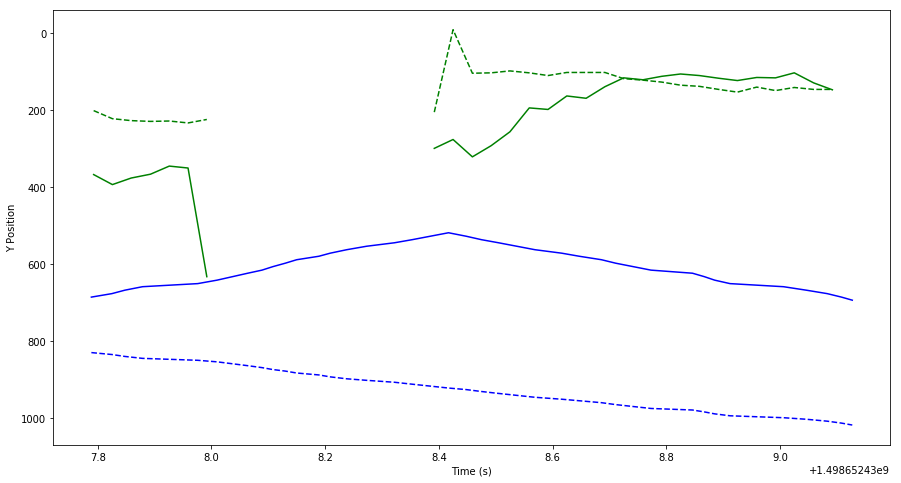

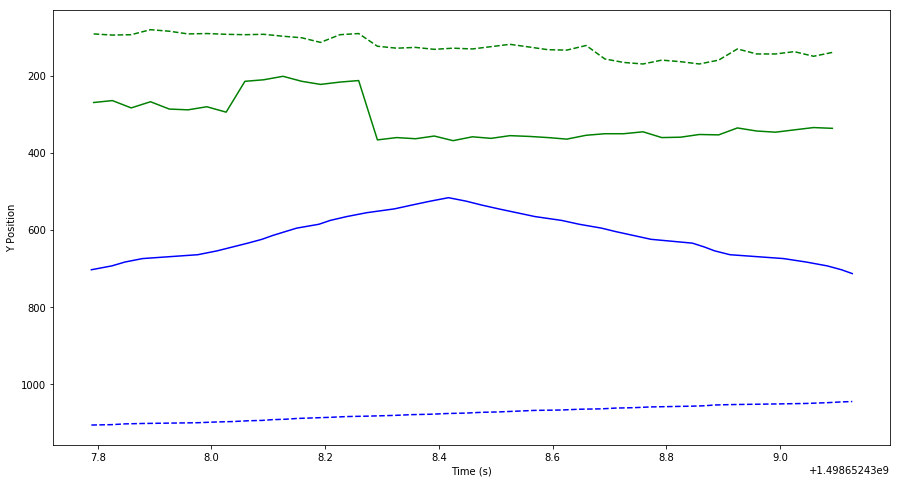

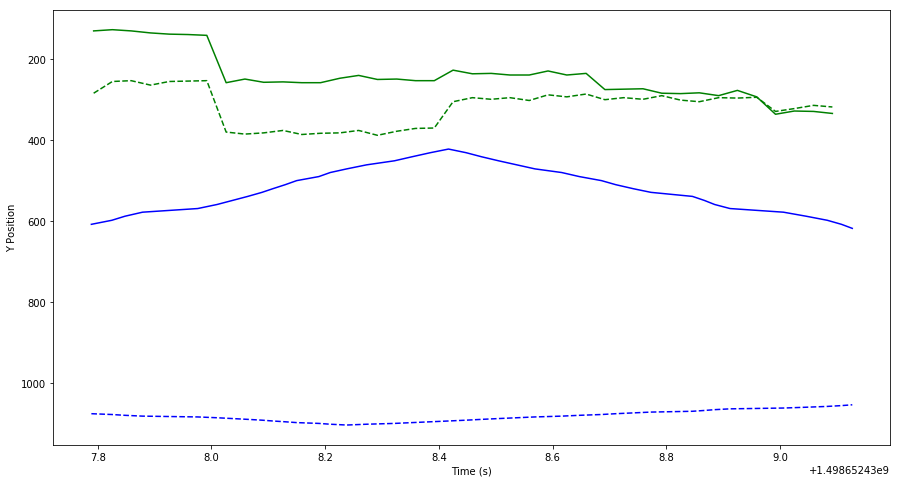

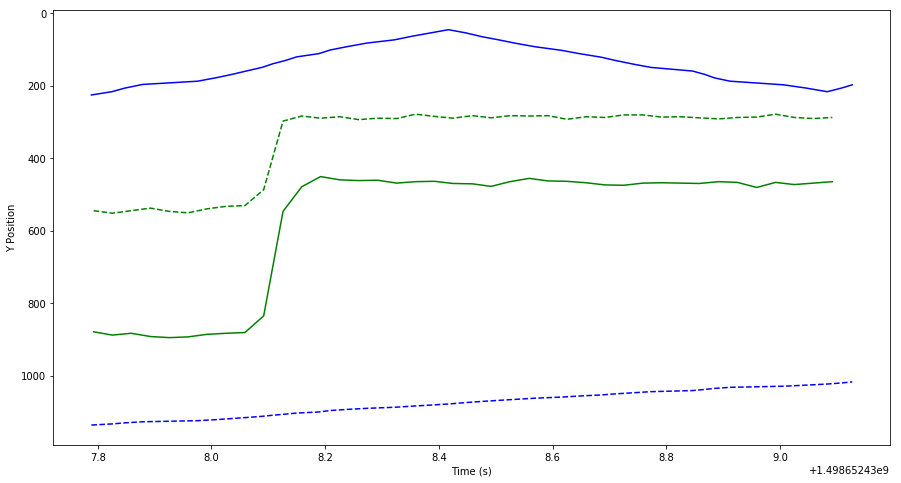

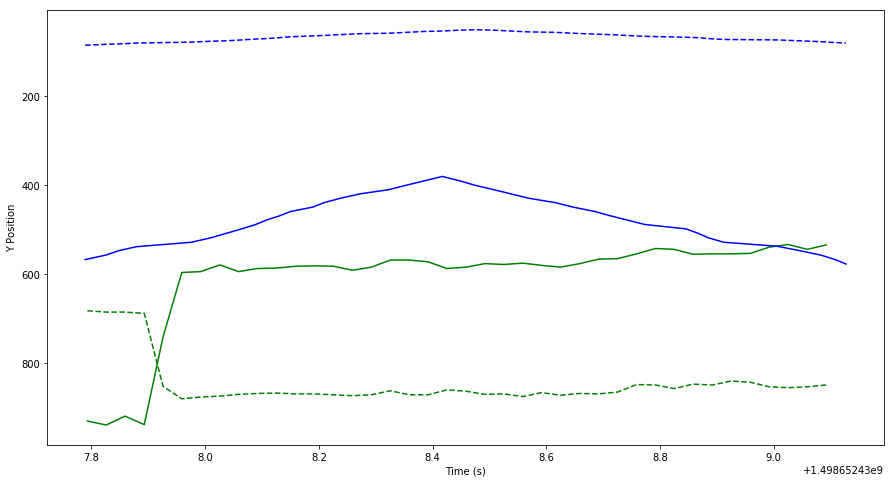

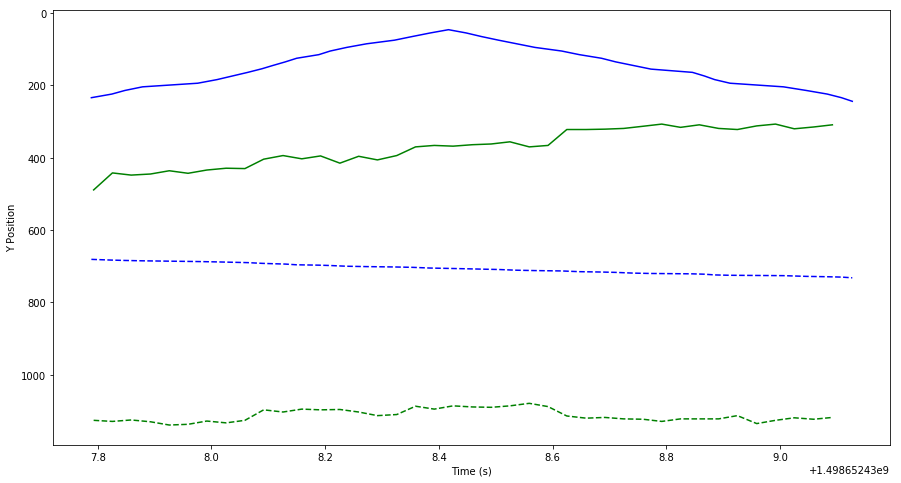

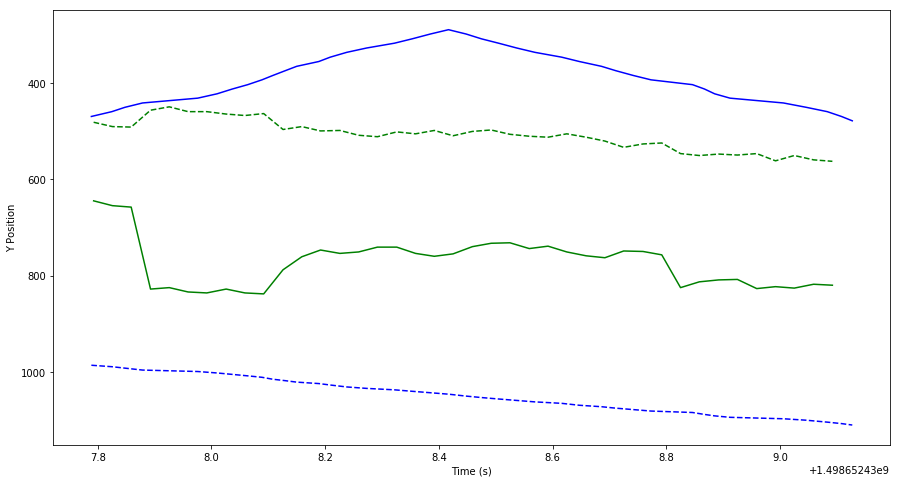

In [15]:
deltav = 20
fig = []
j = 0
for v in grad:
    fig.append(fig)
    fig[j], ax = plt.subplots(figsize=(15,8))
    ax.plot(t['gaze'][0:2*deltav], y['gaze'][v-deltav:v+deltav], 'g')
    ax.plot(t['paddle'][0:2*deltav], y['ball'][v-deltav:v+deltav], 'b')
    ax.plot(t['gaze'][0:2*deltav], x['gaze'][v-deltav:v+deltav], 'g--')
    ax.plot(t['paddle'][0:2*deltav], x['ball'][v-deltav:v+deltav], 'b--')
    #ax.plot(t['paddle'][0:2*deltav], y['paddle'][v-deltav:v+deltav], 'r')
    plt.ylabel('Y Position')
    plt.xlabel('Time (s)')
    plt.gca().invert_yaxis()
    j += 1